In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim
import numpy as np
from tqdm import tqdm_notebook

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net()

In [2]:
left = -1
right = 1

In [3]:
net.forward(torch.ones((1,)).to(torch.float32))
params = list(net.parameters())

In [4]:
criterion = nn.MSELoss()

In [5]:
def f(x):
    return x**4 + 10*x**3 + 1

/tmp/ipykernel_41392/3835013520.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for idx in tqdm_notebook(range(10_000)):


  0%|          | 0/10000 [00:00<?, ?it/s]

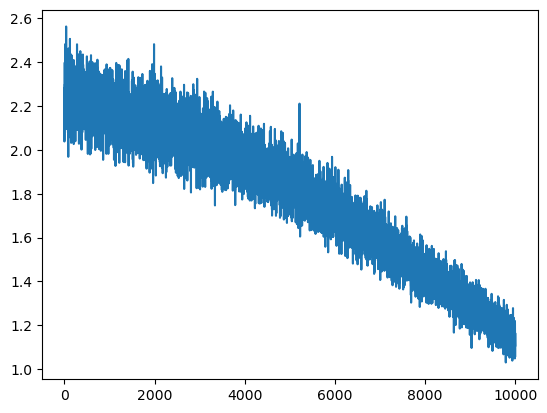

In [7]:
optimizer = optim.SGD(net.parameters(), lr=0.001)
loss_values = []

for idx in tqdm_notebook(range(10_000)):
    kek = np.random.rand(1000, 1) * (right - left) + left
    target = f(kek)
    
    target = torch.tensor(target).to(torch.float32)
    kek    = torch.tensor(kek).to(torch.float32)

    output = net(kek)

    loss = criterion(output, target)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

    loss_values.append(loss.item())
plt.plot(loss_values)

In [8]:
loss_values[-1]

1.1073887348175049

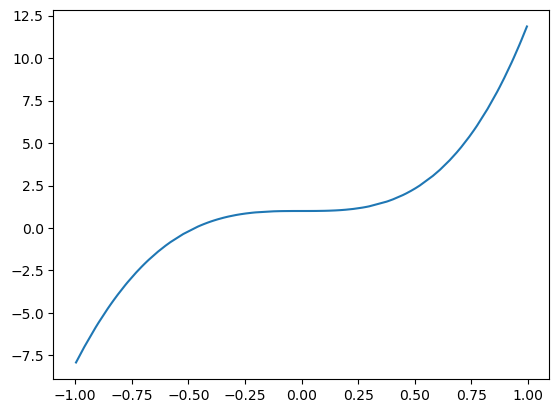

In [9]:
kek = (np.random.rand(100, 1) * (right - left) + left)[:, 0]
target = f(kek)

p = kek.argsort()

plt.plot(kek[p], target[p])

In [12]:
x = np.linspace(left, right, num=2000)
y = f(x)
y_true = y

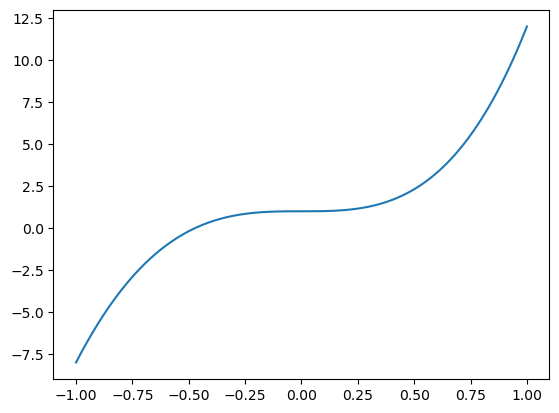

In [13]:
plt.plot(x, y)

In [14]:

x = torch.tensor(x).to(torch.float32)
x = x.unsqueeze(1)
y = net(x)

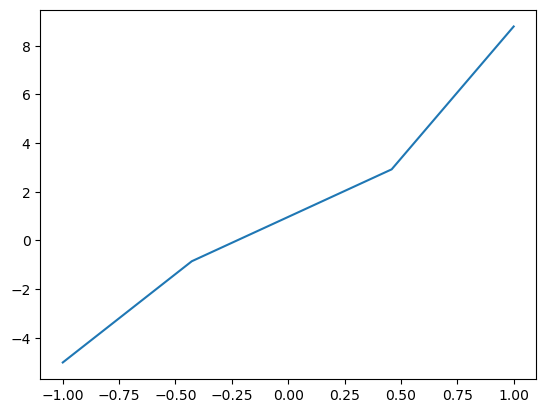

In [15]:
plt.plot(x, y.detach().numpy()[:, 0])

In [22]:
y_pred = y.detach().numpy()[:, 0]

In [23]:
y_true.shape

(2000,)

In [24]:
((y_pred - y_true) ** 2).sum()

5.582003569605337